# <center> CREATE LINES BETWEEN SIGNS USING PROXIMITY, TYPE, & DIRECTION 

# <center> Parking for CB 1

## STEP 1: IMPORT NECESSCARY PACKAGES

In [1]:
import pandas as pd
import geojson
import geopandas as gpd
import gmplot
import matplotlib.pyplot as plt
import plotly.express as px
import os

from shapely.geometry import MultiLineString, LineString, Point
from math import radians, sin, cos, sqrt, atan2

In [9]:
os.getcwd()

'/Users/jadamacharie/Downloads/DOT Internship/CB1'

## STEP 2: IMPORT DATA

In [2]:
# IMPORT SHAPEFILES
Signs = gpd.read_file('')
print(Signs.columns.tolist())
print(Signs.crs)
# Signs.head()
Signs

['SG_KEY_BOR', 'SG_ORDER_N', 'SG_SEQNO_N', 'SG_MUTCD_C', 'SR_DIST', 'SG_SIGN_FC', 'SG_ARROW_D', 'X', 'Y', 'SIGNDESC', 'SIGNDESC1', 'geometry']
GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


,SG_KEY_BOR,SG_ORDER_N,SG_SEQNO_N,SG_MUTCD_C,SR_DIST,SG_SIGN_FC,SG_ARROW_D,X,Y,SIGNDESC,SIGNDESC1,geometry
0,M,P-491591,4,PS-9A,NULL,NULL,NULL,981586.0000,195981.00000,PAY-BY-CELL LOCATOR NUMBER,PAY-BY-CELL LOCATOR NUMBER,POINT (-74.00961 40.70460)
1,M,P-491591,3,PS-269C,NULL,NULL,NULL,981586.0000,195981.00000,3 HMP COMMERCIAL VEHICLES ONLY 7AM-7PM EXCEPT ...,3 HMP COMMERCIAL VEHICLES ONLY 7AM-7PM EXCEPT ...,POINT (-74.00961 40.70460)
2,M,P-514706,4,PS-9A,NULL,NULL,NULL,982397.0000,195994.00000,PAY-BY-CELL LOCATOR NUMBER,PAY-BY-CELL LOCATOR NUMBER,POINT (-74.00668 40.70464)
3,M,P-514706,3,PS-94F,NULL,NULL,NULL,982397.0000,195994.00000,3 HMP COMMERCIAL VEHICLES ONLY MONDAY-FRIDAY 8...,3 HMP COMMERCIAL VEHICLES ONLY MONDAY-FRIDAY 8...,POINT (-74.00668 40.70464)
4,M,P-01306682,5,PS-9A,NULL,NULL,NULL,981525.7335,196090.88249,PAY-BY-CELL LOCATOR NUMBER,PAY-BY-CELL LOCATOR NUMBER,POINT (-74.00980 40.70492)
...,...,...,...,...,...,...,...,...,...,...,...,...
274,M,S-418657,3,PS-1G,NULL,NULL,NULL,981747.0000,196240.00000,"NO STANDING ANYTIME <-> (SUPERSEDES SP-1044B, ...",NO STANDING ANYTIME <->,POINT (-74.00905 40.70527)
275,M,S-418657,4,PS-1GA,NULL,NULL,E,981747.0000,196240.00000,"NO STANDING ANYTIME --> (SUPERSEDES SP-1044BA,...",NO STANDING ANYTIME -->,POINT (-74.00905 40.70527)
276,M,S-425324,4,PS-1G,NULL,NULL,NULL,981487.0000,195996.00000,"NO STANDING ANYTIME <-> (SUPERSEDES SP-1044B, ...",NO STANDING ANYTIME <->,POINT (-74.00996 40.70464)
277,M,S-425324,3,PS-422E,NULL,NULL,NULL,981487.0000,195996.00000,TRUCK (SYMBOL) TRUCK LOADING ONLY 2AM-10AM ALL...,TRUCK (SYMBOL) TRUCK LOADING ONLY 2AM-10AM ALL...,POINT (-74.00996 40.70464)


In [3]:
Edge = gpd.read_file('')
Edge.head()

,blockf_id,conflated,feat_code,shape_leng,source_id,status,sub_code,geometry
0,122260309.0,1.0,2260.0,296.393696,1.222600e+10,Unchanged,226000.0,"LINESTRING (989639.410 198318.832, 989626.845 ..."
1,122260709.0,1.0,2260.0,434.117494,1.222601e+10,Unchanged,226000.0,"LINESTRING (983445.853 200097.374, 983440.315 ..."
2,122260055.0,1.0,2260.0,31.256344,1.222600e+10,Updated,226000.0,"LINESTRING (982061.120 202854.831, 982060.617 ..."
3,122260518.0,1.0,2260.0,170.491174,1.222601e+10,Unchanged,226000.0,"LINESTRING (983230.736 200965.158, 983233.711 ..."
4,122260543.0,0.0,2260.0,10.151556,1.222601e+10,Unchanged,226000.0,"LINESTRING (985882.476 201679.109, 985883.156 ..."


## STEP 3: SPATIALY CLEAN DATA

In [8]:
# #CHANGE PROJECTIONS
Signs.crs
{'init': 'epsg:2263'}
print(Signs.crs)

Edge.crs
{'init': 'epsg:2263'}
Edge.crs

GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- [east]: Easting (US survey foot)
- [north]: Northing (US survey foot)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

## STEP 4: VISUALIZE DATA

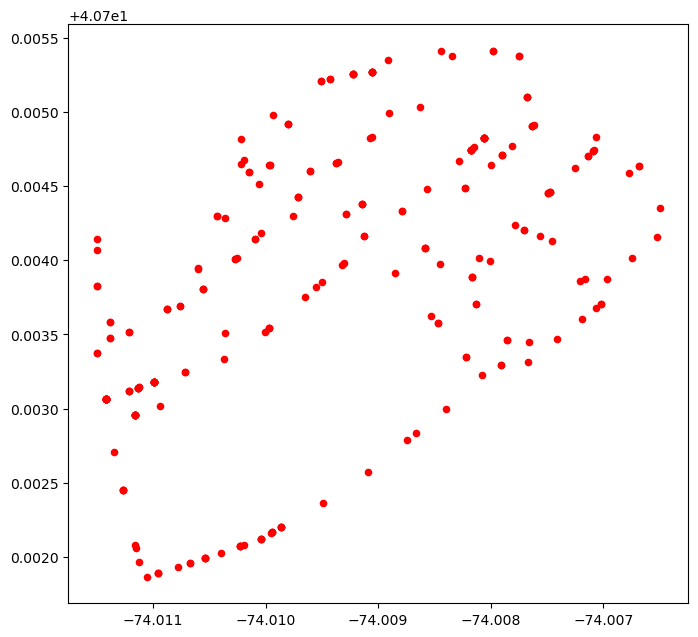

In [5]:
fig, ax = plt.subplots(figsize=(8, 8))
Signs.plot(ax=ax, color='red', markersize=20)
plt.show()

# Sign_fig = px.scatter(Signs, x='X', y='Y', title='Parking Sign Regulations')
# Sign_fig.show()

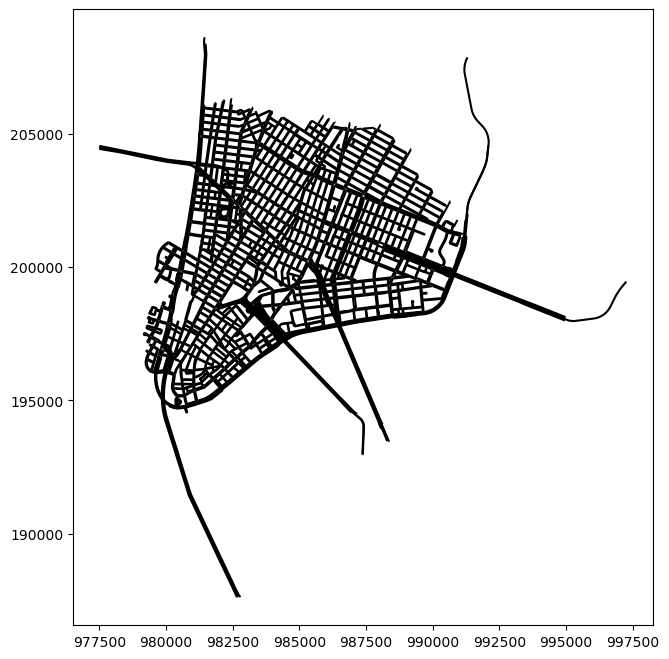

In [6]:
fig, ax = plt.subplots(figsize=(8, 8))
Edge.plot(ax=ax, color='black', markersize=20)
plt.show()

## STEP 5: CREATE LINES BETWEEN SIGN DATA

<Axes: >

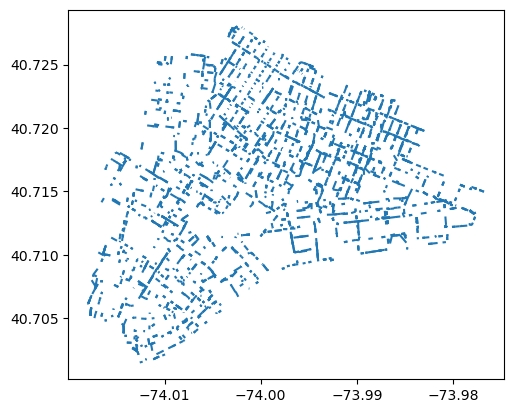

In [10]:
import geopandas as gpd
from sqlalchemy import create_engine

# Replace 'your_database_url' with the actual URL of your database
database_url = ''
engine = create_engine(database_url)

# Query the data from the "separated_lines2" table
query = """
SELECT
    start_point_id,
    end_point_id,
    line_geometry
FROM "DOT"."separated_lines2"
"""
gdf = gpd.read_postgis(query, engine, geom_col='line_geometry')

# Plot the geometries
gdf.plot()



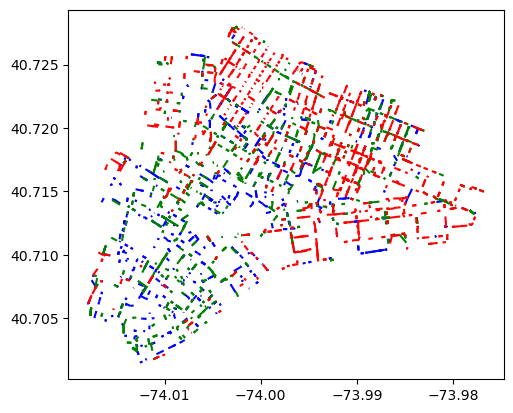

<Figure size 640x480 with 0 Axes>

In [6]:
from sqlalchemy import create_engine

# Replace 'your_database_url' with the actual URL of your database
database_url = ''
engine = create_engine(database_url)

# Query the data from the "separated_lines2" table, including the 'signdesc' column
query = """
SELECT
    sl.start_point_id,
    sl.end_point_id,
    sl.line_geometry,
    ps.signdesc
FROM "DOT"."separated_lines2" AS sl
JOIN "DOT"."ParkingSigns" AS ps ON sl.start_point_id = ps.id
"""
gdf = gpd.read_postgis(query, engine, geom_col='line_geometry')

# Define a function to categorize descriptions
def categorize_description(description):
    if 'NO PARKING' in description:
        return 'NO PARKING'
    elif 'NO STANDING' in description:
        return 'NO STANDING'
    else:
        return 'PAY-BY-CELL'

# Apply the categorization function to create a new column for categories
gdf['category'] = gdf['signdesc'].apply(categorize_description)

# Define a color map for categories
color_map = {
    'NO PARKING': 'red',
    'NO STANDING': 'blue',
    'PAY-BY-CELL': 'green'
}

# Map categories to colors
gdf['color'] = gdf['category'].map(color_map)

# Plot the geometries with color-coded lines
fig, ax = plt.subplots()
for color, geom in gdf.groupby('color'):
    geom.plot(ax=ax, color=color)
    
plt.show()
plt.savefig('plot.png')

with open('parkinglengths.geojson', 'w') as f:
    geojson.dump(feature_collection, f)
    
    


## Validity

In [4]:
from sqlalchemy import create_engine

# Replace 'your_database_url' with the actual URL of your database
database_url = ''
engine = create_engine(database_url)

# Query the data from the "separated_lines2" table
query = """
SELECT
    start_point_id,
    end_point_id,
    line_geometry
FROM "DOT"."separated_lines2"
"""
gdf = gpd.read_postgis(query, engine, geom_col='line_geometry')

# Check for invalid geometries
invalid_geoms = gdf[~gdf.geometry.is_valid]
print("Invalid Geometries:", len(invalid_geoms))

# Fix invalid geometries
gdf['line_geometry'] = gdf['line_geometry'].buffer(0)

# Check again for invalid geometries
invalid_geoms = gdf[~gdf.geometry.is_valid]
print("Invalid Geometries after fixing:", len(invalid_geoms))


Invalid Geometries: 992
Invalid Geometries after fixing: 0


In [13]:
# Check for NaN values in the geometry column
nan_geoms = gdf[gdf.geometry.isna()]
print("NaN Geometries:", len(nan_geoms))

# Check the bounding box values
print("Bounding Box:", gdf.total_bounds)

# Check the bounding box values
bounds = gdf.total_bounds
print("Bounding Box:", bounds)

NaN Geometries: 0
Bounding Box: [nan nan nan nan]
Bounding Box: [nan nan nan nan]


/Users/jadamacharie/anaconda3/lib/python3.10/site-packages/geopandas/array.py:938: RuntimeWarning: All-NaN slice encountered
  np.nanmin(b[:, 0]),  # minx
/Users/jadamacharie/anaconda3/lib/python3.10/site-packages/geopandas/array.py:939: RuntimeWarning: All-NaN slice encountered
  np.nanmin(b[:, 1]),  # miny
/Users/jadamacharie/anaconda3/lib/python3.10/site-packages/geopandas/array.py:940: RuntimeWarning: All-NaN slice encountered
  np.nanmax(b[:, 2]),  # maxx
/Users/jadamacharie/anaconda3/lib/python3.10/site-packages/geopandas/array.py:941: RuntimeWarning: All-NaN slice encountered
  np.nanmax(b[:, 3]),  # maxy
